### Ameya Ghatpande on 11-04-2017 for TaskRabbit Data assignment

#### This project will proceed in following sub parts

1. Data preparation and exploration phase (Nulls checks, Data cleaning if required)
2. Answer the questions asked in assignment

In [50]:
# <aghatpande> on 04-Nov-2017
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [51]:
# <aghatpande> on 04-Nov-2017
# Import the standard libraries
import pandas as pd
import numpy as np

In [52]:
# <aghatpande> on 04-Nov-2017 
# Read all the .CSV files
taskRabbitDF = pd.read_csv("C:\Ameya-Important\TaskRabbit\\sample.csv")

#### Check if any of the columns have "NULL" in Taskrabbit DataFrames

In [53]:
# <aghatpande> on 04-Nov-2017
# Give all the columns which have atleast one NULLS
pd.isnull(taskRabbitDF).sum() > 0

recommendation_id      False
created_at             False
tasker_id              False
position               False
hourly_rate            False
num_completed_tasks    False
hired                  False
category               False
dtype: bool

In [54]:
# <aghatpande> on 04-Nov-2017
# Check the size of overall Data
print("Number of entries in taskrabbit dataframe is", taskRabbitDF.shape)

('Number of entries in taskrabbit dataframe is', (30000, 8))


### Lets answer each of the questions asked in the assignment

#### Q.1 ] How many recommendation sets are in this data sample?
#### A.1 ] This can be found by taking the "unique" number of entries in "recommendation_id" column OR
#### A.1 ] This can be answered by grouping all the recommendations and taking its count

In [55]:
print("Number of recommendation sets in the data sample are", len(taskRabbitDF.recommendation_id.unique()))

('Number of recommendation sets in the data sample are', 2100)


In [56]:
groupbyRecommendationDF = taskRabbitDF.groupby("recommendation_id")
print("Number of recommendation sets in the data sample are", len(groupbyRecommendationDF))

('Number of recommendation sets in the data sample are', 2100)


#### Q.2 ] Each recommendation set shows from 1 to 15 Taskers, what is:
1. average number of Taskers shown
2. median  number of Taskers shown

#### A.2 ] Since each recommendation set has different number of "positions" offered, we have to do following things
1. Groupby recommendation and get the "Maximum" position offered by each set
2. Then we can take the "mean" and "median" functions

In [57]:
# <aghatpande> on 04-Nov-2017
groupbyRecommendationDF = taskRabbitDF.groupby("recommendation_id").agg({"position":"max"})

In [58]:
print("Average number of Taskers is",groupbyRecommendationDF.position.mean())
print("Median number of Taskers is",groupbyRecommendationDF.position.median())

('Average number of Taskers is', 14.291904761904762)
('Median number of Taskers is', 15.0)


#### Q.3] How many total unique Taskers are there in this data sample?
#### A.3] A given tasker can be present in more than one recommendation set. We can use the "unique" function to find this

In [59]:
print("The unique number of Taskers are", len(taskRabbitDF.tasker_id.unique()))

('The unique number of Taskers are', 830)


#### Q.4 ] Which Tasker has been shown the most? 
#### Which Tasker has been shown the least?
#### A.4 ] I will GroupBy tasker_id and take count of each group. This will give me tasker who has been shown the most and least

In [61]:
# <aghatpande> on 04-Nov-2017
# GroupBy taskers and take its count
groupbyTaskers = taskRabbitDF.groupby("tasker_id").agg({"tasker_id":"count"}).rename(columns={'tasker_id':'CountOfTaskers'})

In [62]:
# <aghatpande> on 04-Nov-2017
# Since more than one tasker can be shown as most number of times, instead of using "head" function, I prefer using max() function
# groupbyTaskers.head(1)
taskersWithMaximumPresence = groupbyTaskers[groupbyTaskers.CountOfTaskers == groupbyTaskers.CountOfTaskers.max()]
print("Number of Taskers who are shown maximum time are", len(taskersWithMaximumPresence))
taskersWithMaximumPresence

('Number of Taskers who are shown maximum time are', 1)


,CountOfTaskers
tasker_id,
1014508755,608


In [63]:
# <aghatpande> on 04-Nov-2017
# Since more than one tasker can be shown the least, instead of using "tail" function, I prefer using min() function
# groupbyTaskers.tail(1)
taskersWithMinimumPresence = groupbyTaskers[groupbyTaskers.CountOfTaskers == groupbyTaskers.CountOfTaskers.min()]
print("Number of Taskers who are shown only 1 time are", len(taskersWithMinimumPresence))
taskersWithMinimumPresence

('Number of Taskers who are shown only 1 time are', 68)


,CountOfTaskers
tasker_id,
1006690425,1
1006853970,1
1006899551,1
1007246122,1
1007295623,1
1007383273,1
1007472083,1
1007480912,1
1007638825,1


#### Q.5] Which Tasker has been hired the most?
#### Which Tasker has been hired the least?
#### A.5 ] Here I will first find only those taskers who have been hired. Then I will GroupBy "tasker_id" and take count of Hires.
#### I will use "max" and "min" functions to find the taskers who have been hired the most and the least

In [64]:
# <aghatpande> on 04-Nov-2017
# Create a new Dataframe for only hired taskers
hiredTaskersDF = taskRabbitDF[taskRabbitDF.hired == 1]
groupbyHiredTaskersDF = hiredTaskersDF.groupby("tasker_id").agg({"tasker_id":"count"}).rename(columns={'tasker_id':'CountOfHires'})

In [65]:
hiredTheMostDF = groupbyHiredTaskersDF[groupbyHiredTaskersDF.CountOfHires == groupbyHiredTaskersDF.CountOfHires.max()]
print("The number of taskers who have been hired the most is", len(hiredTheMostDF))
print("The tasker who is hired the most is")
hiredTheMostDF

('The number of taskers who have been hired the most is', 1)
The tasker who is hired the most is


,CountOfHires
tasker_id,
1012043028,59


In [66]:
hiredTheLeastDF = groupbyHiredTaskersDF[groupbyHiredTaskersDF.CountOfHires == groupbyHiredTaskersDF.CountOfHires.min()]
print("The number of taskers who have been hired the least is", len(hiredTheLeastDF))
print("The tasker who is hired the least is")
hiredTheLeastDF

('The number of taskers who have been hired the least is', 79)
The tasker who is hired the least is


,CountOfHires
tasker_id,
1006720321,1
1007146669,1
1007164698,1
1007477780,1
1007480912,1
1007702812,1
1007898815,1
1007955495,1
1008008634,1


#### Q.6 ] If we define the "Tasker conversion rate" as the number of times a Tasker has been hired, out of the number of times the Tasker has been shown, how many Taskers have a conversion rate of 100%
#### A.6] I already have two groupBy dataframes.
1. GroupByHires which shows tasker_id and corresponding number of times tasker has been Hired
2. GroupByTaskers which shows tasker_id and corresponding number of times tasker has been shown

Taking ratio of above two Dataframes gives me "Conversion rate" per tasker. 

In [67]:
# <aghatpande> on 04-Nov-2017
hireToShowRatioDF = groupbyHiredTaskersDF.rename(columns={'CountOfHires':'Conversion_rate'}) / groupbyTaskers.rename(columns={'CountOfTaskers':'Conversion_rate'})

In [68]:
# <aghatpande> on 04-Nov-2017
print("Number of taskers who have conversion rate of 100% are", len(hireToShowRatioDF[hireToShowRatioDF.Conversion_rate == 1]))
hireToShowRatioDF[hireToShowRatioDF.Conversion_rate == 1]

('Number of taskers who have conversion rate of 100% are', 6)


,Conversion_rate
tasker_id,
1007480912,1.0
1008094420,1.0
1008861741,1.0
1011985968,1.0
1012369686,1.0
1014478773,1.0


#### Q.7 ] Would it be possible for all Taskers to have a conversion rate of 100%. Please explain your reasoning.
#### A.7 ] No, given the above datset , it is not possible for all Taskers to have conversion rate of 100%. This is because for each recommendation there can be more than 1 tasker shown. However for each recommendation, there can be only one hire.

#### If the above dataset is changed such that there is only 1 tasker shown per recommendation, and for each recommendation the shown tasker is hired by our customers, then the Conversion rate will be 100% for all taskers

#### Q.8] For each category, what is the average position of the Tasker who is hired?
#### A.8 ] From the subset of "hired" taskers, I will GroupBy "category" and find the "mean" of position in each category

In [69]:
# <aghatpande> on 04-Nov-2017
taskRabbitDF[taskRabbitDF.hired == 1].groupby("category", as_index=False).agg({"position":"mean"})

,category,position
0,Furniture Assembly,3.611888
1,Mounting,4.596085
2,Moving Help,4.145359


#### Q.9 ] For each category, what is the average hourly rate and average number of completed tasks for the Taskers who are hired?
#### A.9 ] From the subset of "hired" taskers, I will GroupBy "category" and then find the "mean" of hourly_rate and "num_completed_tasks" 

In [71]:
# <aghatpande> on 04-Nov-2017
# GroupBy category for successful hires
taskRabbitDF[taskRabbitDF.hired == 1].groupby("category", as_index = False).agg({"hourly_rate":"mean", "num_completed_tasks":"mean"})

,category,num_completed_tasks,hourly_rate
0,Furniture Assembly,249.020979,38.701049
1,Mounting,284.096085,50.154804
2,Moving Help,273.882662,63.012259


#### Q.10 ] Based on the previous, how would you approach the question of:
How can we use market data to suggest hourly rates to Taskers that would maximize their opportunity to be hired?
Please describe in detail, with code and formulas that support your model.

#### A.10 ] In order to suggest hourly rate to Taskers we must observe what successful(those who are hired) taskers data looks like
We have to concentrate on following parameters of successful taskers
1. Number of tasks completed - Because customers will want to hire experienced candidates. This gives the customers a confidence that the assigned work will be done and the experienced candidate has a high probability of handling unknown/challenging work.
2. Hourly rate - Money matters. But customers can pay high for high expertise
3. Category of work - Every category is different and requires different skills and expertise

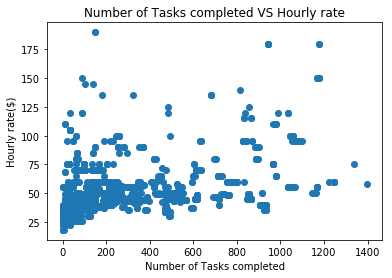

In [72]:
# <aghatpande> on 04-Nov-2017
# Lets find the relationship between "num_hours_completed" and "hourly_rate" in general for all categories
import matplotlib.pyplot as plt
# this allows plots to appear directly in the notebook
%matplotlib inline

plt.scatter(dataForRunningModel["num_completed_tasks"], dataForRunningModel["hourly_rate"])
plt.title('Number of Tasks completed VS Hourly rate')
plt.xlabel('Number of Tasks completed')
plt.ylabel('Hourly rate($)')

##### The above scatterplot shows a positive relationship between the two variables. Lets find the relationship per category

In [73]:
# <aghatpande> on 04-Nov-2017
# Lets find the correlation between "Num_completed_tasks" and "Hourly_rate" per category
taskRabbitDF.groupby("category")[["num_completed_tasks", "hourly_rate"]].corr()

num_completed_tasks  hourly_rate
category                                                                
Furniture Assembly num_completed_tasks             1.000000     0.350775
                   hourly_rate                     0.350775     1.000000
Mounting           num_completed_tasks             1.000000     0.475358
                   hourly_rate                     0.475358     1.000000
Moving Help        num_completed_tasks             1.000000     0.273183
                   hourly_rate                     0.273183     1.000000

In [74]:
# <aghatpande> on 04-Nov-2017
# Lets find the above mentioned paramters for successful Taskers
successfulTaskersDF= taskRabbitDF[taskRabbitDF.hired == 1].groupby("category", as_index = False).agg({"hourly_rate":"mean", "num_completed_tasks":"mean"}).rename(columns={'num_completed_tasks':'Successful_Taskers_Completed_Tasks', 'hourly_rate':'Successful_Tasker_Hourly_Rate'})

# <aghatpande> on 04-Nov-2017
# Lets find the important paramters for unsuccesful Taskers
unsuccessfulTaskersDF = taskRabbitDF[taskRabbitDF.hired == 0].groupby("category", as_index = False).agg({"hourly_rate":"mean", "num_completed_tasks":"mean"}).rename(columns={'num_completed_tasks':'Unsuccessful_Taskers_Completed_Tasks', 'hourly_rate':'Unsuccessful_Tasker_Hourly_Rate'})

# <aghatpande> on 04-Nov-2017
# Lets combine the two Dataframes so that we can compare the results
combinedDF = pd.merge(successfulTaskersDF, unsuccessfulTaskersDF, on="category")
combinedDF


,category,Successful_Taskers_Completed_Tasks,Successful_Tasker_Hourly_Rate,Unsuccessful_Taskers_Completed_Tasks,Unsuccessful_Tasker_Hourly_Rate
0,Furniture Assembly,249.020979,38.701049,182.000212,39.463301
1,Mounting,284.096085,50.154804,216.470227,50.493961
2,Moving Help,273.882662,63.012259,256.616608,83.736345


#### If we observe the above table, for unsuccesful Taskers we can note down following points
1. In each category, On average Unsuccesful taskers have **less** num_completed_tasks as compared to successful Taskers 
2. In each category, On average Unsuccesful Taskers have **high** average hourly rate as compared to successful Taskers

#### We can build a recommendation engine for unsuccessful taskers which can predict/suggest the hourly rate for tasker depending upon
1. His experience (num_completed_tasks)
2. His category of work

##### Model will have
##### Dependent Variable - Hourly rate
##### Independent Variables
1. Category of work
2. Expertise (num_completed_tasks)

In [75]:
# <aghatpande> on 04-Nov-2017
# Select the necessary columns from the taskRabbitDF for running the model
dataForRunningModel = taskRabbitDF[taskRabbitDF.hired == 1][["category", "hourly_rate", "num_completed_tasks"]]

In [76]:
# <aghatpande> on 04-Nov-2017
# By using OLS, we can get the positive/negative impact of these independent variables on Dependent variable
import statsmodels.formula.api as smf

hourlyRate = smf.ols(formula='hourly_rate ~ num_completed_tasks + category', data=dataForRunningModel).fit()
print("\nCoefficients for hourly_rate \n")
hourlyRate.params
#hourlyRate.summary()


Coefficients for hourly_rate 



Intercept                  30.554274
category[T.Mounting]       10.306266
category[T.Moving Help]    23.497855
num_completed_tasks         0.032715
dtype: float64

#### This gives us the formula's to calculate hourly rate for different categories

#### On an average for the unsuccesful taskers, the hourly rate should be
#### For "Furniture Assembly " category -> Hourly_rate = 30.55 + 0.032(*num_task_completed) 
#### For "Mounting" category -> Hourly_rate = 30.55 + 0.032(*num_task_completed) + 10.3
#### For "Moving Help" category -> Hourly_rate = 30.55 + 0.032(*num_task_completed) + 23.49

In [80]:
# <aghatpande> on 04-Nov-2017
# Using the above formula's I have calculated the hourly rate for each category (for the given average num_completed_tasks)
# Create a series of newly calculated hourly_rates
corrected_hourly_rate = pd.Series((39.4,47,62.2))

correctedHourlyRates = taskRabbitDF[taskRabbitDF.hired == 0].groupby("category",as_index = False).agg({"hourly_rate":"mean"})
correctedHourlyRates["corrected_hourly_rate"] = pd.Series(corrected_hourly_rate, index=correctedHourlyRates.index)
print("The below table shows the corrected hourly rates in different categories")
print("So unsuccessful taskers should lower their hourly_rates for getting hired")
correctedHourlyRates

The below table shows the corrected hourly rates in different categories
So unsuccessful taskers should lower their hourly_rates for getting hired


,category,hourly_rate,corrected_hourly_rate
0,Furniture Assembly,39.463301,39.4
1,Mounting,50.493961,47.0
2,Moving Help,83.736345,62.2


#### Future work - The following factors if present in Data could have helped in suggesting the hourly rates to Taskers
1. **Rating/Feedback of each Tasker** - After the Tasker completes the job, feedback can be taken from customer and average rating can be calculated for each tasker. This will surely help the customers to differentiate multiple taskers with same experience and same hourly_rate. This will also give the TaskRabbit system one more datapoint in recommending the tasker to the customer 

## Thank you. This is the end of my data assignment.